# Project: Wrangle and Analyze Data
by Pride Chamisa

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import re
import requests 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

## Data Gathering

1. Downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Making the directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
df_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# Creating a list to hold the json data for all tweets
data = []

with open("tweet_json.txt", "r") as f:
    for line in f:
        data.append(json.loads(line))

# Creating another lists to hold the friends' and followers' counts 
followers_count = []
friends_count = []
for i in range(len(data)):
    followers_count.append(data[i]['user']['followers_count'])
    friends_count.append(data[i]['user']['friends_count'])


In [6]:
df_json = pd.DataFrame(data, columns={'id_str','retweet_count','favorite_count'})

# Adding friends' and followers' counts to the dataframe
df_json['followers_count'] = followers_count
df_json['friends_count'] = friends_count


## Assessing Data
In this section, I will detect and document **quality issues and tidiness issues** using visual assessment and programmatic assessement to assess the data.


In [7]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
df_json

,id_str,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,33873,7034,9257748,21
1,892177421306343426,29384,5309,9257748,21
2,891815181378084864,22099,3490,9257748,21
3,891689557279858688,36998,7243,9257748,21
4,891327558926688256,35376,7784,9257748,21
5,891087950875897856,17845,2609,9257748,21
6,890971913173991426,10391,1674,9257748,21
7,890729181411237888,56951,15802,9257748,21
8,890609185150312448,24564,3635,9257748,21
9,890240255349198849,28002,6117,9257747,21


Dataset 1: Enhanced Twitter Archive

In [10]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_twitter.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Bailey            7
Daisy             7
an                7
Toby              7
Buddy             7
Leo               6
Bella             6
Rusty             6
Stanley           6
Jack              6
Jax               6
Dave              6
Scout             6
Oscar             6
Koda              6
Milo              6
Sunny             5
               ... 
Orion             1
Mya               1
Chuck             1
Teddy             1
Kuyu              1
Jed               1
Eleanor           1
Barclay           1
Robin             1
Pete              1
Tilly             1
Pip               1
Boots             1
Bonaparte         1
Mitch             1
Zoe               1
Beckham           1
Diogi             1
Staniel           1


In [12]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
sum(df_twitter.duplicated())

0

In [15]:
df_twitter.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

**Dataset 2: Image Predictions**

In [16]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [19]:
sum(df_predictions.jpg_url.duplicated())

66

**Dataset 3 : Twitter json**

In [20]:
df_json.head()

,id_str,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,33873,7034,9257748,21
1,892177421306343426,29384,5309,9257748,21
2,891815181378084864,22099,3490,9257748,21
3,891689557279858688,36998,7243,9257748,21
4,891327558926688256,35376,7784,9257748,21


In [21]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
id_str             2327 non-null object
favorite_count     2327 non-null int64
retweet_count      2327 non-null int64
followers_count    2327 non-null int64
friends_count      2327 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.0+ KB


In [22]:
df_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2327.00000,2327.000000,2.327000e+03,2327.0
mean,7068.45853,2478.686721,9.257762e+06,21.0
std,10983.78533,4197.058465,5.827342e+01,0.0
min,0.00000,1.000000,9.257747e+06,21.0
25%,1227.00000,497.500000,9.257750e+06,21.0
50%,3055.00000,1152.000000,9.257757e+06,21.0
75%,8621.00000,2872.000000,9.257757e+06,21.0
max,145178.00000,70966.000000,9.258238e+06,21.0


In [23]:
df_json.dtypes

id_str             object
favorite_count      int64
retweet_count       int64
followers_count     int64
friends_count       int64
dtype: object

In [24]:
df_json.nunique()

id_str             2327
favorite_count     1979
retweet_count      1652
followers_count      21
friends_count         1
dtype: int64

### Quality issues

1. There are retweets, and the columns: `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'` have plenty of empty values

2. `timestamp` values have a +0000 attached

3. Erroneous datatype in `tweet_id` and `timestamp`

4. Missing column for the fraction: rating_numerator / rating_denominator

5. Incorrect dog names listed as `a`, `the` and `an`

6. Source data has unwanted link tags

7. Dog names listed as None instead of NaN

8. The dog breed names are separated by a '_' instead of space

9. Duplicated urls in jpg_url

10. Naming convection of `id_str` not consistent with `tweet_id`


### Tidiness issues
1. The columns doggo, puppo, pupper, floofer should be combined into a single column

2. All the 3 tables should be one dataset


## Cleaning Data
In this section, I will be cleaning of the issues documented while assessing. 

In [25]:
# Make copies of original pieces of data
df_twitter_clean = df_twitter.copy()
df_predictions_clean = df_predictions.copy()
df_json_clean = df_json.copy()

In [26]:
df_twitter_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,None,None,None,None
1178,719551379208073216,NaN,NaN,2016-04-11 15:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harnold. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719551379...,10,10,Harnold,None,None,None,None
627,794983741416415232,NaN,NaN,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rizzy. She smiles a lot...,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,None,None,None


###  There are retweets, and the columns: `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'` have plenty of empty values

#### Define
Delete retweets by removing all entries for retweeted_status_user_id that are not null

#### Code

In [27]:
df_twitter_clean = df_twitter_clean[np.isnan(df_twitter_clean.retweeted_status_id)]

#### Test

In [28]:
# Confirming null entries in retweeted status user id
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define:
Drop the multiple columns with plenty of empty values

#### Code


In [29]:
df_twitter_clean = df_twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp'],1)

#### Test

In [30]:
# Confirming the dropped columns are nolonger part of the dataframe
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### `timestamp` values have a +0000 attached

#### Define
- Truncate the last 5 values of timestamp with string slicing

#### Code

In [31]:
# Slicing the last 5 values of timestamp
df_twitter_clean.timestamp = df_twitter_clean.timestamp.str[:-5]

#### Test

In [32]:
# Confirming trailing zeros are removed
df_twitter_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
234,847617282490613760,2017-03-31 01:11:22,"<a href=""http://twitter.com/download/iphone"" r...",.@breaannanicolee PUPDATE: Cannon has a heart ...,NaN,13,10,None,None,None,None,None
1939,673887867907739649,2015-12-07 15:32:42,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a great time sleeping and y...,https://twitter.com/dog_rates/status/673887867...,10,10,None,None,None,None,None


### Erroneous datatype in `tweet_id` and `timestamp`

#### Define
- Convert the datatype of tweet_id from int to string 
- Convert the datatype of timestamp from string to datetime

#### Code

In [33]:
df_twitter_clean.tweet_id = df_twitter_clean.tweet_id.astype(str)
df_predictions_clean.tweet_id = df_twitter_clean.tweet_id.astype(str)
df_twitter_clean['timestamp']= pd.to_datetime(df_twitter_clean['timestamp'])

#### Test

In [34]:
# Confirming the datatype changes
df_twitter_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Missing column for the fraction: rating_numerator / rating_denominator

#### Define
Create a new column 'rating_fraction'

#### Code

In [35]:
df_twitter_clean['fraction'] = df_twitter_clean['rating_numerator'].astype(float)/df_twitter_clean['rating_denominator'].astype(float)

#### Test

In [36]:
df_twitter_clean['fraction'].sample(3)

121     1.2
1444    0.9
716     1.2
Name: fraction, dtype: float64

### Incorrect dog names listed as `a`, `the` and `an`

#### Define
Replace all occurences of dog names that start with small letters

#### Code

In [37]:
# https://github.com/tharcyla/wrangle-and-analyze-data/blob/main/wrangle_act.ipynb

# Getting the index of all wrong names
err = df_twitter_clean[df_twitter_clean['name'].str.contains(r'^[a-z]')]['name'].index

# Changing them to NaN
df_twitter_clean.loc[err, 'name'] = np.nan


#### Test

In [38]:
# Confirming changes
df_twitter_clean['name'].value_counts()

None         680
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Bailey         6
Oscar          6
Stanley        6
Jax            6
Bo             6
Koda           6
Bella          6
Dave           5
Louis          5
Buddy          5
Bentley        5
Scout          5
Leo            5
Rusty          5
Milo           5
Chester        5
Jeffrey        4
Larry          4
            ... 
Carll          1
Gordon         1
Willem         1
Jeffri         1
Schnozz        1
Robin          1
Crawford       1
Diogi          1
Cora           1
Andru          1
Boston         1
Dobby          1
Harnold        1
Brockly        1
Sully          1
Jamesy         1
Trigger        1
Travis         1
Damon          1
Ashleigh       1
Pete           1
Alexander      1
Tilly          1
Pip            1
Boots          1
Bilbo          1
Mitch          1
Zoe           

### Source data has unwanted link tags attached

#### Define
Remove the link tags from source data using regular expressions

#### Code

Ref: https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

In [39]:
df_twitter_clean.source = df_twitter_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [40]:
# Confirming the link tags are removed
df_twitter_clean.source.sample(3)

1226    Twitter for iPhone
2171    Twitter for iPhone
825     Twitter for iPhone
Name: source, dtype: object

### Missing dog names listed as None instead of NaN

#### Define
Change all 'None' entries to NaN

#### Code

In [41]:
err = df_twitter_clean.query('name == "None"').index

# Changing them to NaN
df_twitter_clean.loc[err, 'name'] = np.nan

#### Test

In [42]:
df_twitter_clean['name'].sample(8)

2163       Billl
1124        Ziva
1046     Bentley
2351         NaN
676          NaN
1907         NaN
1129    Pupcasso
2214         NaN
Name: name, dtype: object

### The dog breed names are separated by a '_' instead of space

#### Define
Replace the '_' in all entries with space and capitalise the first letter

#### Code

In [43]:
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.replace('_', ' ').str.title()
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.replace('_', ' ').str.title()
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.replace('_', ' ').str.title()


#### Test

In [44]:
df_predictions_clean.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1959,673576835670777856,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,Golden Retriever,0.673664,True,Kuvasz,0.157523,True,Labrador Retriever,0.126073,True
1430,697575480820686848,https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,1,Blenheim Spaniel,0.427766,True,Shih-Tzu,0.219256,True,Welsh Springer Spaniel,0.144614,True
1884,674800520222154752,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston Bull,0.381836,True,Doormat,0.065868,False
928,754747087846248448,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,Golden Retriever,0.514085,True,Chesapeake Bay Retriever,0.173224,True,Brittany Spaniel,0.118384,True


### Duplicated urls in jpg_url

#### Define
Dele the duplicates

#### Code

In [45]:
df_predictions_clean = df_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [46]:
sum(df_predictions_clean['jpg_url'].duplicated())


0

### Naming convection of `id_str` not consistent with `tweet_id`

#### Define
Change the column name for `id_str` to `tweet_id`

#### Code

In [47]:
df_json_clean.rename({'id_str':'tweet_id'}, axis=1, inplace=True)

#### Test

In [48]:
df_json_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count', 'followers_count',
       'friends_count'],
      dtype='object')

### The columns doggo, puppo, pupper, floofer should be combined into a single column

#### Define
Combine the columns into a new column 'dog_stage'

#### Code

In [49]:
# Creating a new 'dog_stage' column
df_twitter_clean['dog_stage'] = df_twitter_clean['text'].str.extract('(floofer|doggo|pupper|puppo)', expand=True)

#Changing its datatype
df_twitter_clean['dog_stage'] = df_twitter_clean['dog_stage'].astype('category')

In [50]:
# Deleting the previous columns
df_twitter_clean = df_twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], 1)

#### Test

In [51]:
df_twitter_clean['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

### All the 3 tables should be joined to form one dataset

#### Define
Merge all the tables

#### Code

In [52]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
tweet_id           2327 non-null object
favorite_count     2327 non-null int64
retweet_count      2327 non-null int64
followers_count    2327 non-null int64
friends_count      2327 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.0+ KB


In [53]:
df_all = pd.merge(df_twitter_clean, df_predictions_clean, how = 'inner', on = ['tweet_id'])

# merging with twitter json clean
df_all = pd.merge(df_all, df_json_clean, how = 'inner', on = ['tweet_id'])


#### Test

In [54]:
# Confirming the fully merged dataset
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 25 columns):
tweet_id              1826 non-null object
timestamp             1826 non-null datetime64[ns]
source                1826 non-null object
text                  1826 non-null object
expanded_urls         1771 non-null object
rating_numerator      1826 non-null int64
rating_denominator    1826 non-null int64
name                  1193 non-null object
fraction              1826 non-null float64
dog_stage             346 non-null category
jpg_url               1826 non-null object
img_num               1826 non-null int64
p1                    1826 non-null object
p1_conf               1826 non-null float64
p1_dog                1826 non-null bool
p2                    1826 non-null object
p2_conf               1826 non-null float64
p2_dog                1826 non-null bool
p3                    1826 non-null object
p3_conf               1826 non-null float64
p3_dog                1826 

## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
df_all.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, I will be analyzing and visualizing the wrangled data. 

### Insights:

In [56]:
# Importing the new stored master dataset
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [57]:
# Changing back datatypes
twitter_archive_master['timestamp']= pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master['source'] = twitter_archive_master['source'].astype('category')
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype('str')

**1. Most popular dog names**

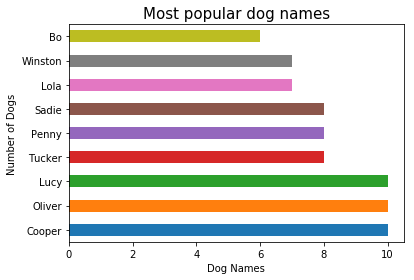

In [65]:
most_popular_name = twitter_archive_master.name.value_counts()[1:10].sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Dog Names');
plt.ylabel('Number of Dogs');
plt.title('Most popular dog names', size=15);
plt.savefig('popular-dog-names');

From the bar graph, it is observed that Charlie and Lucy were the most popular dog names

**2. The most liked dog stages**

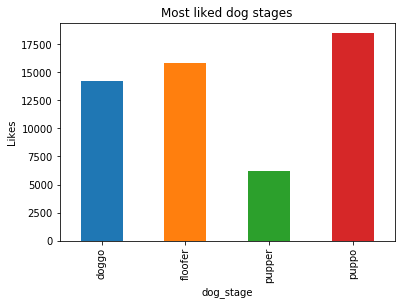

In [59]:
twitter_archive_master.groupby('dog_stage').favorite_count.mean().plot(kind='bar', title='Most liked dog stages');
plt.ylabel('Likes');


**3. The most retweeted dog stages**

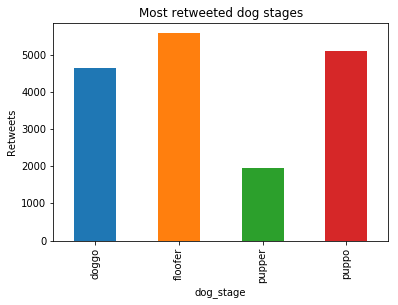

In [60]:
twitter_archive_master.groupby('dog_stage').retweet_count.mean().plot(kind='bar', title='Most retweeted dog stages');
plt.ylabel('Retweets');

While puppo was the most liked dog stage, floofer was the most retweeted dog stage

**4. The relationship between favourite_count and retweet_count**

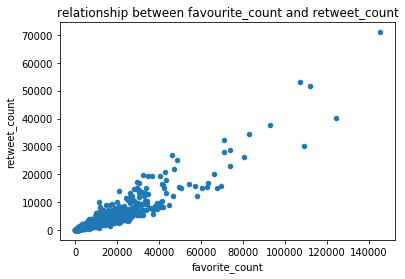

In [61]:
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'relationship between favourite_count and retweet_count');

From the above graph, it is observed that favourite count is directly proportional to retweet count

**5. The most common source of tweets**

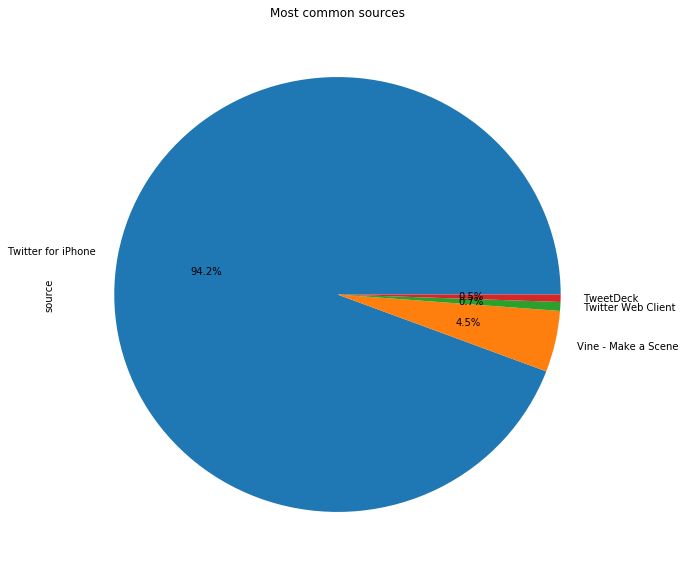

In [62]:
most_common_source = twitter_archive_master['source'].value_counts()[0:5]
most_common_source.plot(kind='pie', title='Most common sources', autopct='%.1f%%', figsize=(10,10));


The above pie-chart shows that 'Twitter for iPhone' was the most common source of tweets

### Visualization

**Visualizing the distribution of tweets over time**

Ref: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

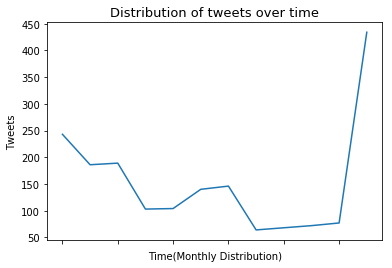

In [63]:
twitter_archive_master['tweet_id'].groupby([twitter_archive_master['timestamp'].dt.month, twitter_archive_master['timestamp'].dt.month]).count().plot(kind='line');
plt.title('Distribution of tweets over time', size=13);
plt.xlabel('Time(Monthly Distribution)');
plt.ylabel('Tweets');

In [64]:
twitter_archive_master['timestamp'].dt.month.value_counts()

12    434
1     243
3     189
2     186
7     146
6     140
5     104
4     103
11     77
10     72
9      68
8      64
Name: timestamp, dtype: int64

This shows that most  tweets were tweeted in December followed by November and January